Setup

In [ ]:
# !pip install pandas
import numpy as np
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
import pandas as pd

In [ ]:
import pickle 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial

# /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/ mypath

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


In [ ]:
x_path = "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/XoheImp.csv" 
y_path = "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/Y.csv"

In [ ]:
#Set X and y values
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

In [ ]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42, stratify = y_train)

In [ ]:
# SVM Classifier model
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),
                    SGDClassifier(loss = 'modified_huber', verbose = 3, max_iter = 1000, tol=1e-3, alpha = 0.1))

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
YpredVal = clf.predict(X_val)

In [ ]:
YpredProb = clf.predict_proba(X_val)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, YpredVal))
print("F1:",metrics.f1_score(y_val, YpredVal, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.matthews_corrcoef(y_val, YpredVal))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y)
y_val_le = le.transform(y_)

print("ROC_AUC:", metrics.roc_auc_score(y_val_le, YpredProb, multi_class = 'ovr', average = 'macro'))

Accuracy: 0.9157976373481795
F1: 0.8953571129470939
Matthew's Correlation Coefficient: 0.5594518158685984


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC_AUC: 0.5249323820516548


In [ ]:
with open('SVM', 'wb') as files:
    pickle.dump(clf, files)

Some hyperparameter tuning

Due to the large amount of data, and the multiclass problem, RBF Kernel and LinearSVC are more difficult to run, computationally speaking. 

In [ ]:
# Try stronger alpha 
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf1 = make_pipeline(StandardScaler(),
                    SGDClassifier(loss = 'modified_huber', verbose = 3, max_iter = 1000, tol=1e-3, alpha = 0.01))

In [ ]:
clf1 = clf1.fit(X_train, y_train)

In [ ]:
with open('SVM1', 'wb') as files:
    pickle.dump(clf1, files)

In [ ]:
YpredVal = clf1.predict(X_val)

In [ ]:
YpredProb = clf1.predict_proba(X_val)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, YpredVal))
print("F1:",metrics.f1_score(y_val, YpredVal, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.matthews_corrcoef(y_val, YpredVal))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y)
y_val_le = le.transform(y_val)

print("ROC_AUC:", metrics.roc_auc_score(y_val_le, YpredProb, multi_class = 'ovr', average = 'macro'))

Accuracy: 0.9287118977384464
F1: 0.9172574678843786
Matthew's Correlation Coefficient: 0.6438833172178893


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC_AUC: 0.49811870479838977


In [ ]:
# Try stronger alpha 
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#clf2 = make_pipeline(StandardScaler(),
                    #SGDClassifier(loss = 'modified_huber', verbose = 3, max_iter = 1000, tol=1e-3, alpha = 0.001))
clf2 = Pipeline([('scaler', StandardScaler()), ('svm', SGDClassifier(loss = 'modified_huber', verbose = 3, max_iter = 1000, tol=1e-3, alpha = 0.001))])

In [ ]:
clf2 = clf2.fit(X_train, y_train)

In [ ]:
with open('SVM2', 'wb') as files:
    pickle.dump(clf2, files)

In [ ]:
YpredVal = clf2.predict(X_val)

YpredProb = clf2.predict_proba(X_val)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, YpredVal))
print("F1:",metrics.f1_score(y_val, YpredVal, average="weighted"))
print("Matthew's Correlation Coefficient:",metrics.matthews_corrcoef(y_val, YpredVal))

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y)
y_val_le = le.transform(y_val)

print("ROC_AUC:", metrics.roc_auc_score(y_val_le, YpredProb, multi_class = 'ovr', average = 'macro'))

Accuracy: 0.9385101167476837
F1: 0.932046610081303
Matthew's Correlation Coefficient: 0.7056116943725373


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC_AUC: 0.7032402066832127


In [127]:
ScoresSVM = pd.DataFrame([[0.1, 0.9091, 0.8849, 0.5105, 0.6168],[0.01, 0.9283, 0.9155, 0.6412, 0.6306], [0.001, 0.9384, 0.9320, 0.7054, 0.6789 ]], columns = [ "alpha", "accuracy", "F1", "MCC", "ROC-AUC"])

In [128]:
ScoresSVM.to_csv("ScoresSVM.csv", sep=";")

In [129]:
ScoresSVM

,alpha,accuracy,F1,MCC,ROC-AUC
0,0.100,0.9091,0.8849,0.5105,0.6168
1,0.010,0.9283,0.9155,0.6412,0.6306
2,0.001,0.9384,0.9320,0.7054,0.6789


In [145]:
print(ScoresSVM.to_latex(index=False))  

\begin{tabular}{rrrr}
\toprule
 accuracy &     F1 &    MCC &  ROC-AUC \\
   0.9091 & 0.8849 & 0.5105 &   0.6168 \\
\midrule
   0.9283 & 0.9155 & 0.6412 &   0.6306 \\
   0.9384 & 0.9320 & 0.7054 &   0.6789 \\
\bottomrule
\end{tabular}



In [ ]:
import matplotlib.pyplot as plt
plt.savefig("ScoresSVM.png")

<Figure size 432x288 with 0 Axes>

In [124]:
from pandas.core.common import flatten

coeff_SVM = pd.DataFrame(zip(X_train.columns, np.transpose(list(flatten(clf2.named_steps['svm'].coef_)))), columns=['features', 'coef'])

In [ ]:
coeff_sorted = coeff_SVM.sort_values(by=['coef'], ascending=False).head(10)

In [ ]:
coeff_sorted

,features,coef
187,trx_outlet1_b'communication',8.658296
237,trx_outlet1_b'mobile',5.590014
8,"trx_family_code_b""b'COMM'""",5.340659
360,trx_purpose1_b'withdrawals',4.964163
483,rem_hh_count_byti_other,4.328955
27,"trx_family_code_b""b'MOBMNY'""",4.016879
218,trx_outlet1_b'individual',3.161054
39,"trx_family_code_b""b'RR'""",3.036825
348,trx_purpose1_b'resources',2.648638
387,con_prod_hh_medpti,1.994798


In [141]:
print(coeff_sorted.to_latex(index=False))  

\begin{tabular}{lr}
\toprule
                    features &     coef \\
\midrule
trx\_outlet1\_b'communication' & 8.658296 \\
       trx\_outlet1\_b'mobile' & 5.590014 \\
  trx\_family\_code\_b"b'COMM'" & 5.340659 \\
 trx\_purpose1\_b'withdrawals' & 4.964163 \\
     rem\_hh\_count\_byti\_other & 4.328955 \\
trx\_family\_code\_b"b'MOBMNY'" & 4.016879 \\
   trx\_outlet1\_b'individual' & 3.161054 \\
    trx\_family\_code\_b"b'RR'" & 3.036825 \\
   trx\_purpose1\_b'resources' & 2.648638 \\
          con\_prod\_hh\_medpti & 1.994798 \\
\bottomrule
\end{tabular}



In [ ]:
import matplotlib.pyplot as plt
plt.savefig('coeff_sorted.png', dpi=300)

<Figure size 432x288 with 0 Axes>

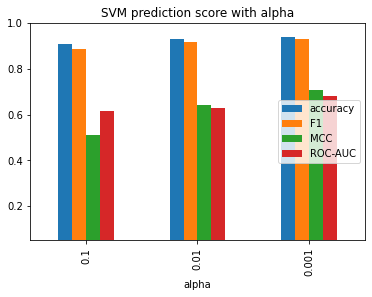

In [140]:
ScoresSVM = ScoresSVM.set_index('alpha')

ScoresSVM.plot.bar(ylim = (0.05, 1), title = 'SVM prediction score with alpha').legend(loc='center right')

In [142]:
constants_SVM = pd.DataFrame(zip(X_train.columns, np.transpose(list(flatten(clf2.named_steps['svm'].intercept_)))), columns=['features', 'coef'])

In [144]:
constants_SVM.head(10)

,features,coef
0,"trx_family_code_b""b'ADVANCE'""",-1089.622089
1,"trx_family_code_b""b'AGRI'""",-1030.713090
2,"trx_family_code_b""b'ALC'""",-1256.919240
3,"trx_family_code_b""b'ARREARS'""",2.498451
4,"trx_family_code_b""b'CASH'""",-1338.260868
5,"trx_family_code_b""b'CITMPC'""",-1340.420719
6,"trx_family_code_b""b'CLN'""",-1239.358945
7,"trx_family_code_b""b'CLTH'""",-1286.124844
8,"trx_family_code_b""b'COMM'""",-1222.027667
9,"trx_family_code_b""b'EDU'""",-871.766724
